In [89]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
#import matplotlib.pyplot as plt
#print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
#import sklearn
#print("scikit-learn version: {}".format(sklearn.__version__))

import seaborn as sns

Python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.1.3
NumPy version: 1.19.5
SciPy version: 1.5.2
IPython version: 7.19.0
scikit-learn version: 0.23.2


In [90]:
def status(data):

    data2=data

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

## Lo primero leer el dataset

In [121]:
# el dataset sera un csv o un exel en general pero puede venir en otros formatos
# en este caso la mayoria de variables son categoricas.
# tener en cuenta al leer los datos :
# si son fechas con formato europeo especificarlo al leer
# si las variables numericas estan en un formato de tipo "3,000,98" especificarlo
#son parametros que se pasan en el read_csv y se encuentran en https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#para leer excel https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

df = pd.read_csv("bank_customer_survey.csv")

In [122]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Conociendo los datos 

In [123]:
#nos dice la cantidad de filas y columnas
df.shape

(45211, 17)

In [94]:
#nos dice nulos , valores 0  cantidad de unicos  y tipo de datos
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,77,int64
1,job,0,0.0,0,0.000000,12,object
2,marital,0,0.0,0,0.000000,3,object
3,education,0,0.0,0,0.000000,4,object
4,default,0,0.0,0,0.000000,2,object
5,balance,0,0.0,3514,0.077724,7168,int64
6,housing,0,0.0,0,0.000000,2,object
7,loan,0,0.0,0,0.000000,2,object
8,contact,0,0.0,0,0.000000,3,object
9,day,0,0.0,0,0.000000,31,int64


In [124]:
print(df.shape)
df=df.dropna()
print(df.shape)

(45211, 17)
(45211, 17)


In [127]:
# nos dice la cantidad que hay de cada valor: Se usa con datos categoricos

df.contact.value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [128]:
df.y.value_counts(normalize=True)

0    0.883015
1    0.116985
Name: y, dtype: float64

In [129]:
# nos brinda informacion estadistica de una variable
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

## como navegamos en los datos

In [ ]:
df[df['age']>91]

In [134]:
df[df['age']>91]['age']

31233    94
33699    95
41663    95
41934    92
42727    92
44262    93
44420    93
Name: age, dtype: int64

In [133]:
df[(df['age']>91) & (df['y']==1)].shape

(5, 17)

In [136]:
df.query('(age>91) & (y==1)')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
33699,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,1
41934,92,retired,married,unknown,no,775,no,no,cellular,22,oct,313,3,-1,0,unknown,1
42727,92,retired,married,unknown,no,775,no,no,cellular,26,jan,164,4,96,3,success,1
44262,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,1
44420,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,1


In [138]:
df.query('(age>=92) & (y!=0)')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
33699,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,1
41934,92,retired,married,unknown,no,775,no,no,cellular,22,oct,313,3,-1,0,unknown,1
42727,92,retired,married,unknown,no,775,no,no,cellular,26,jan,164,4,96,3,success,1
44262,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,1
44420,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,1


In [139]:
print("tamaño balance menor a 0:",df[df['balance']<0].shape[0])

df[df['balance']<0].head()



tamaño balance menor a 0: 3766


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,0
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,0
36,25,blue,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,0
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,0
45,36,admin,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,0


In [142]:
df["balancePositivo"]= df["duration"].apply(lambda x: 1 if x>0 else 0)


In [143]:
df["newCol"]= df["duration"]/60
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,newCol,balancePositivo
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,4.350000,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,2.516667,1


## Un ejemplo : Que ocurre en las campañas

In [65]:
df['campaign'].value_counts(normalize=True).head(5)

1    0.388047
2    0.276592
3    0.122116
4    0.077901
5    0.039017
Name: campaign, dtype: float64

In [110]:
cantidadLlamadasPorCampaña = df.groupby(by=["campaign"]).count()['y']

cantidadLeadPorCampaña = df.groupby(by=["campaign"]).sum()['y']


expLeadXcalls = pd.DataFrame( {'cantidadLlamadasPorCampaña':cantidadLlamadasPorCampaña,
                               'cantidadLeadPorCampaña': cantidadLeadPorCampaña})
expLeadXcalls.head()


,cantidadLlamadasPorCampaña,cantidadLeadPorCampaña
campaign,,
1,17544,2561
2,12505,1401
3,5521,618
4,3522,317
5,1764,139


In [120]:
expLeadXcalls['leadsXcalls']= cantidadLeadPorCampaña/cantidadLlamadasPorCampaña
expLeadXcalls.sort_values(by='leadsXcalls',ascending=False).head()

,cantidadLlamadasPorCampaña,cantidadLeadPorCampaña,leadsXcalls
campaign,,,
1,17544,2561,0.145976
2,12505,1401,0.112035
3,5521,618,0.111936
32,9,1,0.111111
4,3522,317,0.090006


outliers : valores atipicos

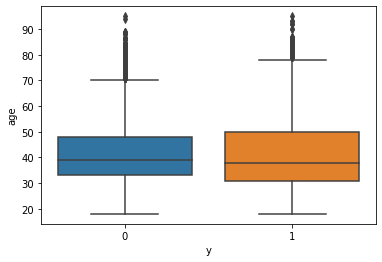

In [144]:


ax = sns.boxplot(x="y", y="age", data=df)

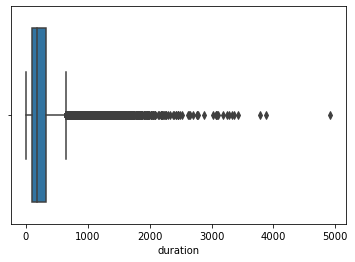

In [145]:
ax = sns.boxplot(x=df['duration'])

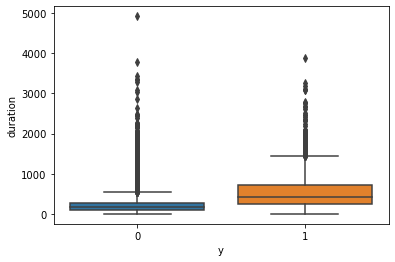

In [146]:
ax = sns.boxplot(x="y", y="duration", data=df)

In [147]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,balance,day,duration,campaign,pdays,previous,y,newCol,balancePositivo
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00,0.03,-0.00,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02,0.05,0.02,-0.00
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05,-0.03,-0.03,-0.01
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00,0.39,1.00,0.01
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03,-0.07,-0.08,-0.01
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45,0.10,-0.00,0.00
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00,0.09,0.00,0.00
y,0.03,0.05,-0.03,0.39,-0.07,0.10,0.09,1.00,0.39,0.00
newCol,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00,0.39,1.00,0.01
balancePositivo,0.00,-0.00,-0.01,0.01,-0.01,0.00,0.00,0.00,0.01,1.00


C:\Users\Dicsys\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  common_grid,
C:\Users\Dicsys\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  common_grid,


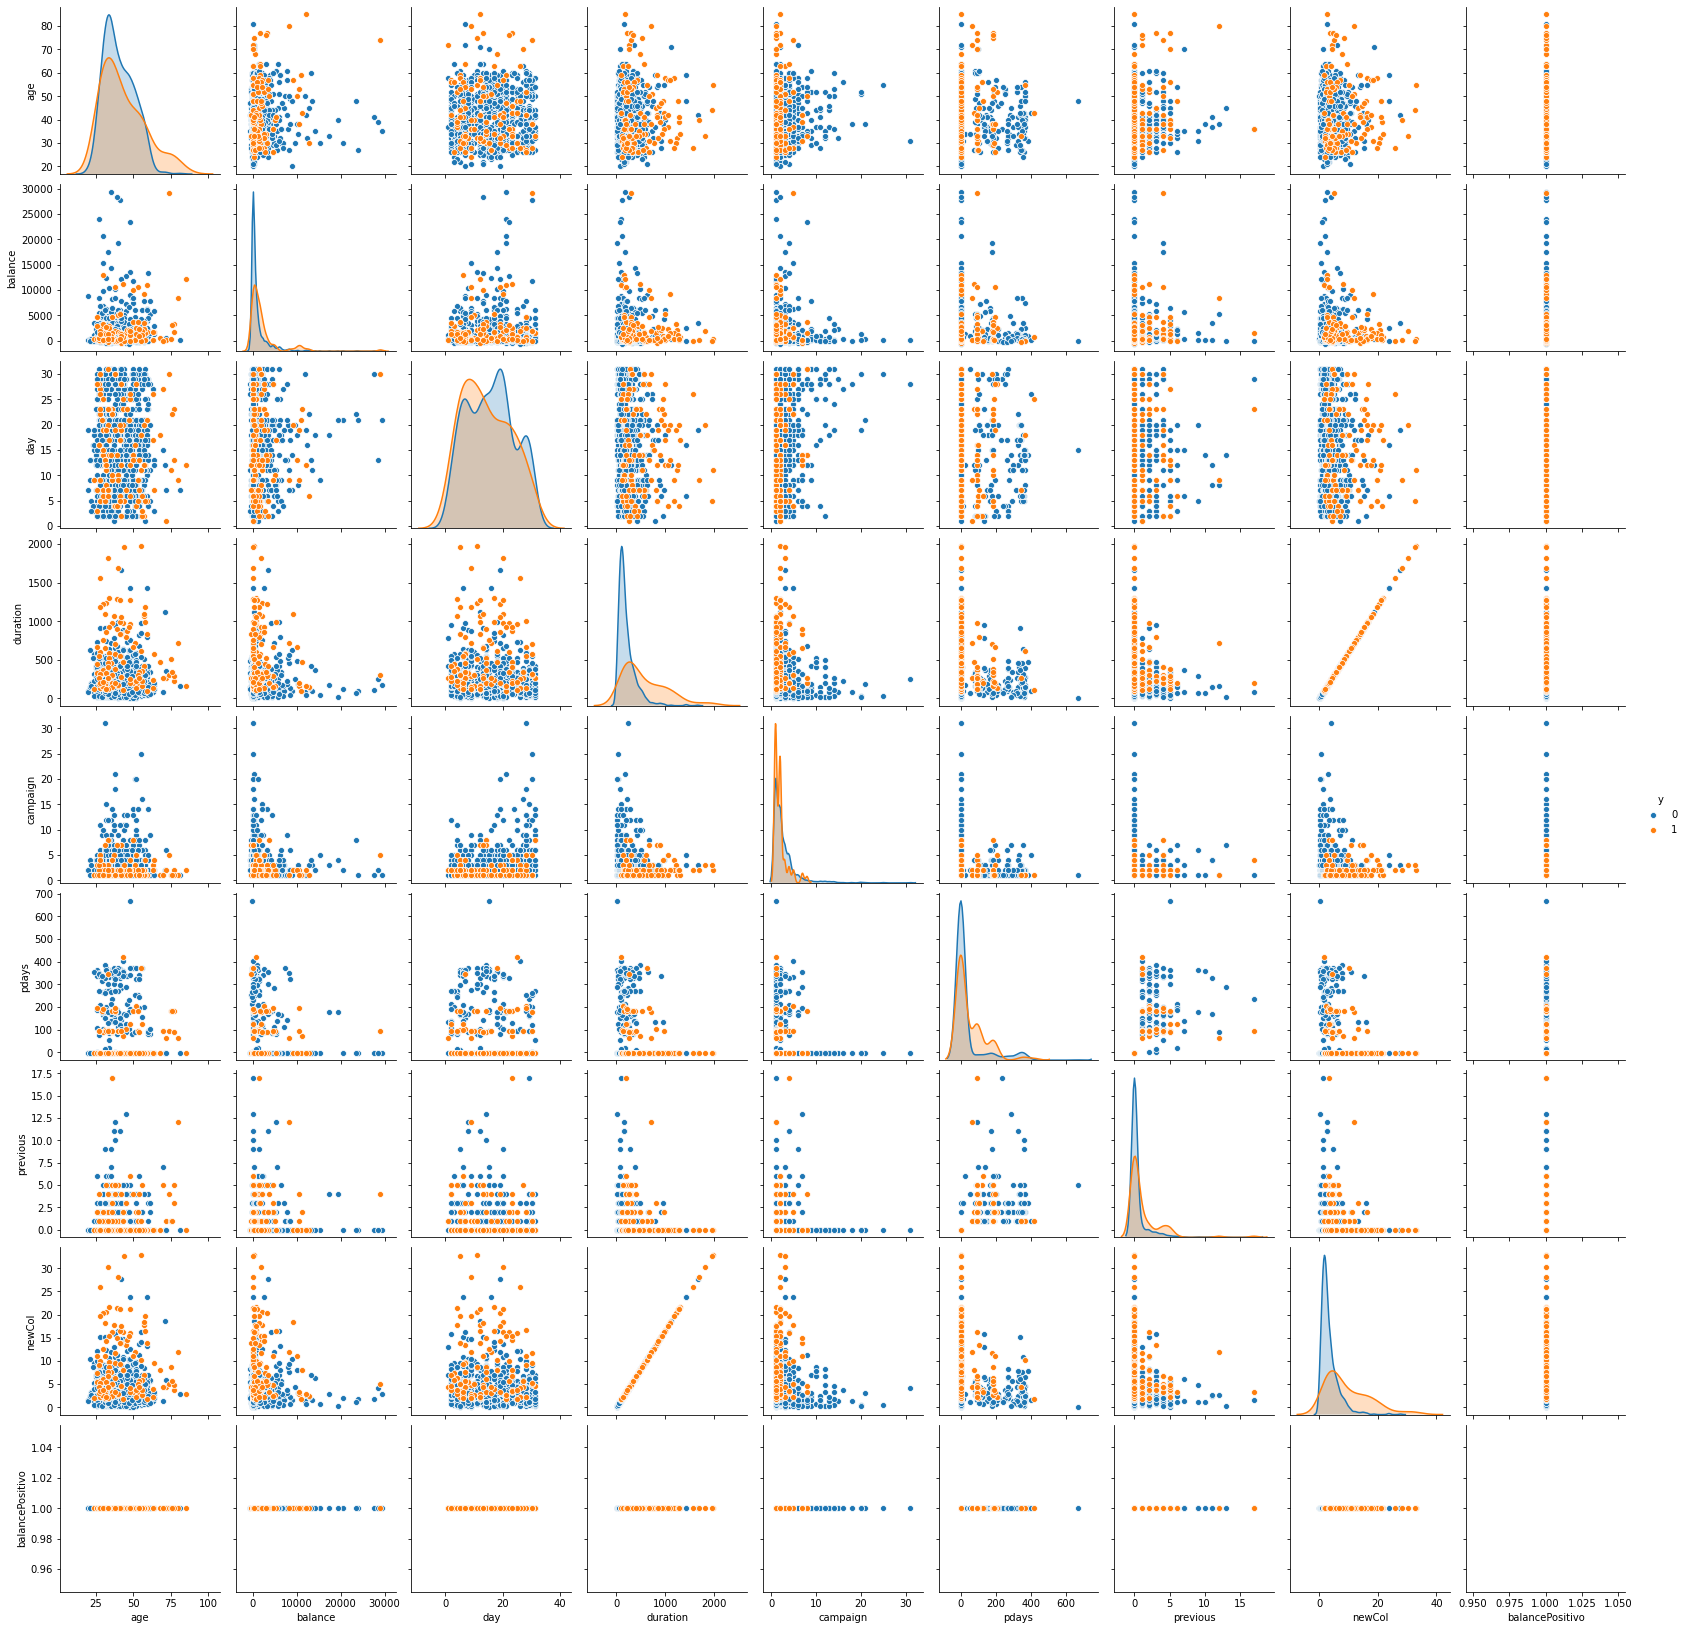

In [149]:
sample1000= df.sample(n=1000)
sns.pairplot(sample1000,hue="y")

In [ ]:
#Tarea: tratar de contestar una pregunta que sobre los datos.
#Algunos ejemplos

#Que campaña tiene mas leads

#como se distribuye la edad

#Cual es el balance mas alto
#Que trabajo y educacion tienen los compradores, Y los no compradores?